# <center>By Udayabhanu Nayak CSE Grad 2024</center>

# <center>Deep Learning (Convolutional Neural Network) CNN</center>

## Categorical 3 class

### Importing the libraries

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

C:\Users\udaya\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\udaya\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\udaya\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
tf.__version__

'2.12.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,#feature scaling to each and every value by diving all value 255 .
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(r"C:\Users\udaya\OneDrive\Desktop\Deep Learning\lung_infection-CNN\lung_infection_data_set\train",
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 251 images belonging to 3 classes.


### Preprocessing the Test set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(r"C:\Users\udaya\OneDrive\Desktop\Deep Learning\lung_infection-CNN\lung_infection_data_set\test",
                                            target_size = (64, 64),
                                            batch_size = 32,#how many images in each batch
                                            class_mode = 'categorical')

Found 66 images belonging to 3 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [5]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,activation='relu',input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [9]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
#rectifier activation 

### Step 5 - Output Layer

In [11]:
cnn.add(tf.keras.layers.Dense(units=3, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [12]:
cnn.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [13]:
h=cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
8/8 [==============================] - 12s 1s/step - loss: 1.1811 - accuracy: 0.4104 - val_loss: 1.1323 - val_accuracy: 0.3030
Epoch 2/25
8/8 [==============================] - 8s 987ms/step - loss: 0.9793 - accuracy: 0.5896 - val_loss: 1.2359 - val_accuracy: 0.1212
Epoch 3/25
8/8 [==============================] - 8s 1s/step - loss: 0.7222 - accuracy: 0.7610 - val_loss: 1.7578 - val_accuracy: 0.0909
Epoch 4/25
8/8 [==============================] - 9s 1s/step - loss: 0.5394 - accuracy: 0.7968 - val_loss: 2.7809 - val_accuracy: 0.0606
Epoch 5/25
8/8 [==============================] - 8s 1s/step - loss: 0.4285 - accuracy: 0.8287 - val_loss: 3.5029 - val_accuracy: 0.0606
Epoch 6/25
8/8 [==============================] - 9s 1s/step - loss: 0.4242 - accuracy: 0.8367 - val_loss: 3.5326 - val_accuracy: 0.0909
Epoch 7/25
8/8 [==============================] - 10s 1s/step - loss: 0.5274 - accuracy: 0.7610 - val_loss: 3.3194 - val_accuracy: 0.0909
Epoch 8/25
8/8 [====================

# Part 4 - Making a single prediction

In [14]:
cnn.save('model.h5')

In [16]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img(r"C:\Users\udaya\OneDrive\Desktop\Deep Learning\lung_infection-CNN\lung_infection_data_set\test\Type 1 disease\096.png", target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices

1/1 [==============================] - 0s 93ms/step


{'Healthy': 0, 'Type 1 disease': 1, 'Type 2 disease': 2}

In [29]:
# print(np.argmax(result[0]))

0


In [26]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the trained model
from tensorflow.keras.models import load_model
cnn = load_model('model.h5')

# Define the class labels
class_labels = {0: 'Healthy', 1: 'Type 1 disease', 2: 'Type 2 disease'}

# Function to make predictions
@tf.function
def predict(image_path):
    test_image = image.load_img(image_path, target_size=(64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result = cnn(test_image)  # Call the model directly on the input
    label_index = tf.argmax(result, axis=1)  # Find the index of the maximum value
    return label_index

# Example usage
image_path = r"C:\Users\udaya\OneDrive\Desktop\Deep Learning\lung_infection-CNN\lung_infection_data_set\test\Type 2 disease\0108.jpeg"
result = predict(image_path)
prediction_index = result.numpy()[0]
prediction_label = class_labels[prediction_index]
print("Prediction:", prediction_label)


Prediction: Type 2 disease


In [32]:
# if np.argmax(result[0])==0:
#     print("Healthy")
# elif np.argmax(result[0]==1):
#     print("Type 1 desease")
# else:
#     print("Type 2 desease")

Healthy


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

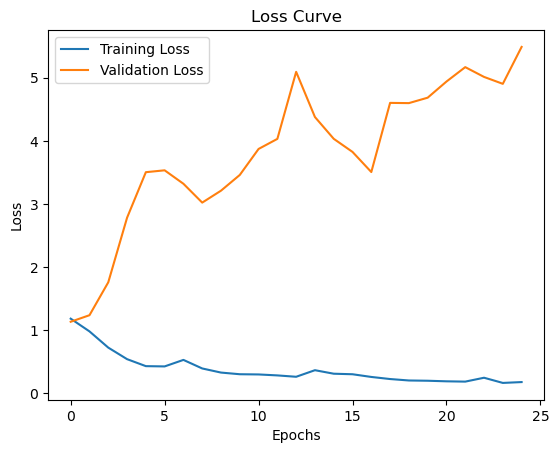

In [30]:
plt.plot(h.history['loss'], label='Training Loss')
plt.plot(h.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix
pred = np.argmax(cnn.predict(test_set),axis=1)

3/3 [==============================] - 1s 242ms/step


In [ ]:
cm = confusion_matrix(np.argmax(test_set,axis=1),pred)
print(cm)

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)
plt.show()

# GUI

In [1]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import tensorflow as tf
import numpy as np

# Load the trained model
# from tensorflow.keras.models import load_model

# Define the class labels
class_labels = {0: 'Healthy', 1: 'Type 1 disease', 2: 'Type 2 disease'}

# Load the trained model
cnn = tf.keras.models.load_model('model.h5')

# Function to make predictions
@tf.function
def predict(image):
    result = cnn(image)  # Call the model directly on the input tensor
    label_index = tf.argmax(result, axis=1)  # Find the index of the maximum value
    return label_index

# Function to handle button click event
def on_click():
    file_path = filedialog.askopenfilename(filetypes=[('Image Files', '*.jpg;*.jpeg;*.png')])
    if file_path:
        image = Image.open(file_path).convert('RGB')  # Open the image using PIL
        image = image.resize((64, 64))  # Resize the image to the desired size
        image = np.array(image)  # Convert the image to a NumPy array
        image = np.expand_dims(image, axis=0)  # Add an extra dimension

        result = predict(image)
        prediction_index = result.numpy()[0]
        prediction_label = class_labels[prediction_index]

        if prediction_label == 'Healthy':
            prediction_color = '#00FF00'  # Green color
        else:
            prediction_color = '#FF0000'  # Red color
        prediction_text.config(text=prediction_label, fg=prediction_color)
        image_label.configure(image=ImageTk.PhotoImage(image))
        image_label.image = ImageTk.PhotoImage(image)

# Create the Tkinter window
window = tk.Tk()
window.title("Lung Disease Detector")
window.geometry("500x300")

# Create the title label
title_label = tk.Label(window, text="Lung Disease Detector", font=("Arial", 24, "bold"))
title_label.pack(pady=10)

# Create the image label
image_label = tk.Label(window)
image_label.pack(pady=10)

# Create the upload button
upload_button = tk.Button(window, text="Upload Image", command=on_click)
upload_button.pack(pady=10)

# Create the prediction label
prediction_text = tk.Label(window, font=("Arial", 18))
prediction_text.pack(pady=10)

# Run the Tkinter event loop
window.mainloop()


C:\Users\udaya\anaconda3\lib\site-packages\PIL\ImageTk.py:122: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if mode not in ["1", "L", "RGB", "RGBA"]:
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\udaya\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\udaya\AppData\Local\Temp\ipykernel_1572\3173573140.py", line 41, in on_click
    image_label.configure(image=ImageTk.PhotoImage(image))
  File "C:\Users\udaya\anaconda3\lib\site-packages\PIL\ImageTk.py", line 123, in __init__
    mode = Image.getmodebase(mode)
  File "C:\Users\udaya\anaconda3\lib\site-packages\PIL\Image.py", line 274, in getmodebase
    return ImageMode.getmode(mode).basemode
  File "C:\Users\udaya\anaconda3\lib\site-packages\PIL\ImageMode.py", line 91, in getmode
    return _modes[mode]
TypeError: unhashable type: 'numpy.ndarray'
Exception in Tkinter 

# <center>Thank You From `Udaya`</center>